# Student Performance Indicator

### Life cycle of Machine learning project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Model training
- Choose best model

## 1. Problem Statement
This project understand how the students performance (test score) is affected by other variables sunch as Gender, Enthnicity, parental level of education, Lunch and Test prepararion course.

## 2. Data Collection
Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The dataset consist of 9 column and 1000 rows

## 2.1 Import data and Required Packages

Importing pandas, Numpy, Matplotlib, seaborn and warnings Library.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the csv Data as pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

## show top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## shape of the dataset

In [5]:
df.shape

(1000, 8)

## 2.2 Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Data checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


## 3.1 Check missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### there is no missing values

## 3.2 check duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

### There are no duplicates values in the data set

## 3.3 Check data types

In [10]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Statistics of dataset

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standarad deviations are close - between 14.6 and 15.19;
- while there is a mininum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

## 3.7 Exploring data

In [19]:
print("categories in 'gender' varible:  ", end= " ")
print(df['gender'].unique())
print("categories in 'race/ethnicity' varible:  ", end= " ")
print(df['race_ethnicity'].unique())    
print("categories in 'parental level of education' varible:  ", end= " ")
print(df['parental_level_of_education'].unique())    
print("categories in 'lunch' varible:  ", end= " ")
print(df['lunch'].unique())    
print("categories in 'test_preparation_course' varible:  ", end= " ")
print(df['test_preparation_course'].unique())   

categories in 'gender' varible:   ['female' 'male']
categories in 'race/ethnicity' varible:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' varible:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' varible:   ['standard' 'free/reduced']
categories in 'test_preparation_course' varible:   ['none' 'completed']


In [20]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(" we have {} numerical features : {}".format(len(numeric_features), numeric_features))
print(" we have {} categorical features : {}".format(len(categorical_features), categorical_features))  

 we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
 we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding columns for "Total Score" and "Average"

In [25]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,averge_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [28]:
df.drop(columns=['averge_score'], inplace=True)

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print("Number of students with full score in Reading: ", reading_full)
print("Number of students with full score in Writing: ", writing_full)
print("Number of students with full score in Math: ", math_full)

Number of students with full score in Reading:  17
Number of students with full score in Writing:  14
Number of students with full score in Math:  7


In [32]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print("Number of students with less than or equal to 20 score in Reading: ", reading_less_20)
print("Number of students with less than or equal to 20 score in Writing: ", writing_less_20)
print("Number of students with less than or equal to 20 score in Math: ", math_less_20)

Number of students with less than or equal to 20 score in Reading:  1
Number of students with less than or equal to 20 score in Writing:  3
Number of students with less than or equal to 20 score in Math:  4


## Insights

- from above values we got students have performed the worst in Maths
- best Perfromance is in reading section

## 4. Exploring Data (visulization)

### 4.1 Visulize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

## 4.1.1 Histogram & KDE

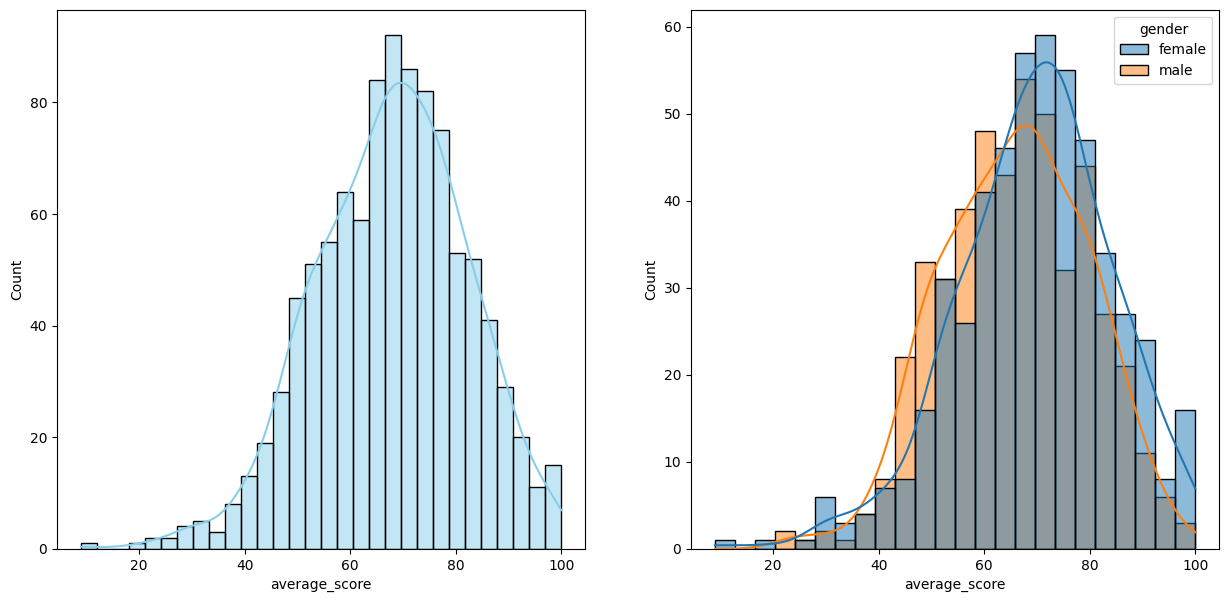

In [36]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x= 'average_score', bins= 30, kde= True, color= 'skyblue')
plt.subplot(122)
sns.histplot(data = df, x= 'average_score', kde = True, hue= 'gender')
plt.show()

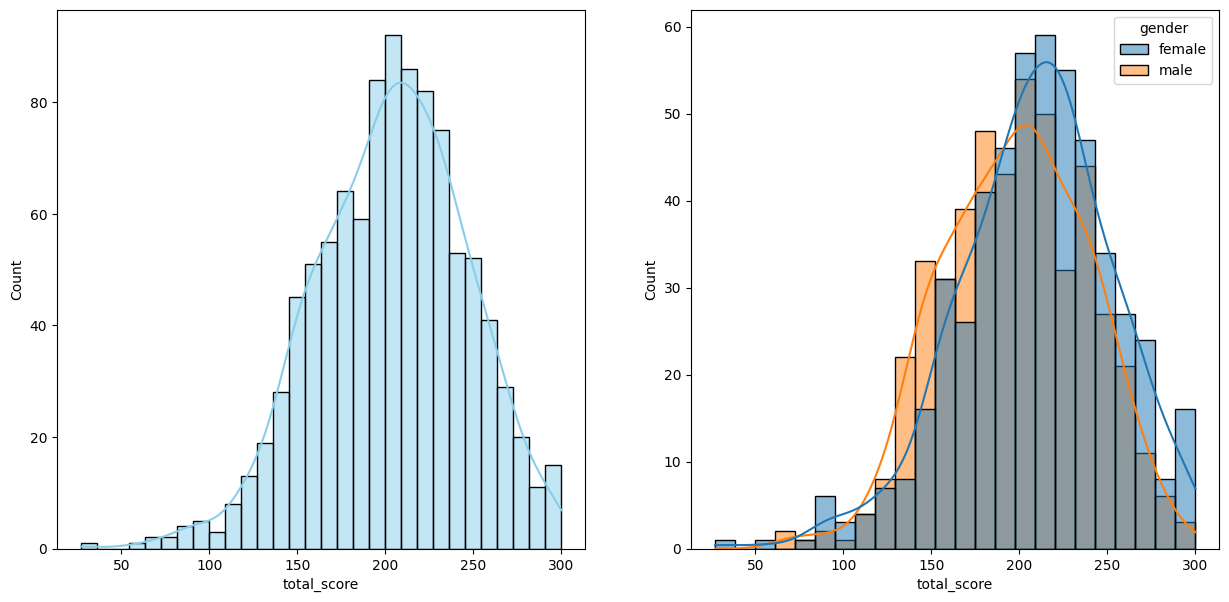

In [37]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x= 'total_score', bins= 30, kde= True, color= 'skyblue')
plt.subplot(122)
sns.histplot(data = df, x= 'total_score', kde = True, hue= 'gender')
plt.show()

## insights
- female students tend to perform well then male students

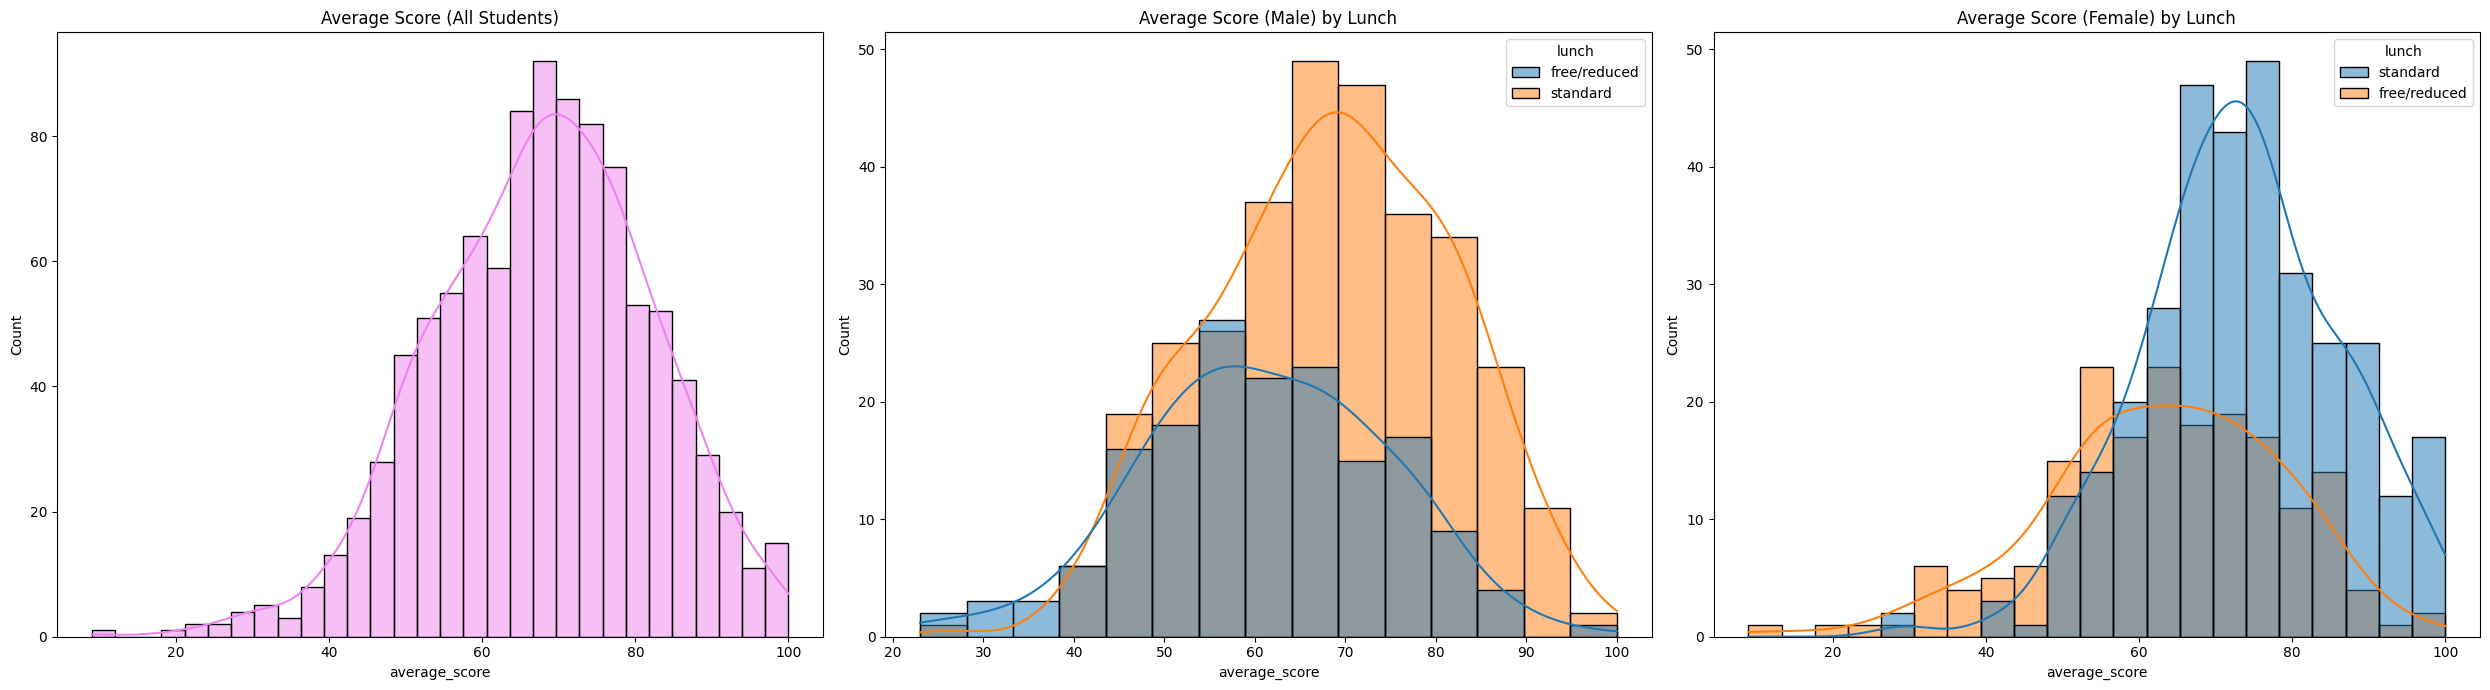

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# Plot 1 – All students
sns.histplot(
    data=df,
    x='average_score',
    bins=30,
    kde=True,
    color='violet',
    ax=axs[0]
)
axs[0].set_title("Average Score (All Students)")

# Plot 2 – Male students
sns.histplot(
    data=df[df.gender == 'male'],
    x='average_score',
    kde=True,
    hue='lunch',
    ax=axs[1]
)
axs[1].set_title("Average Score (Male) by Lunch")

# Plot 3 – Female students
sns.histplot(
    data=df[df.gender == 'female'],
    x='average_score',
    kde=True,
    hue='lunch',
    ax=axs[2]
)
axs[2].set_title("Average Score (Female) by Lunch")

plt.tight_layout()
plt.show()


## Insight :

- Standard lunch helps to perform well in exams.
- Standard lunch helps to perform well in exams for both genders (Male and female).

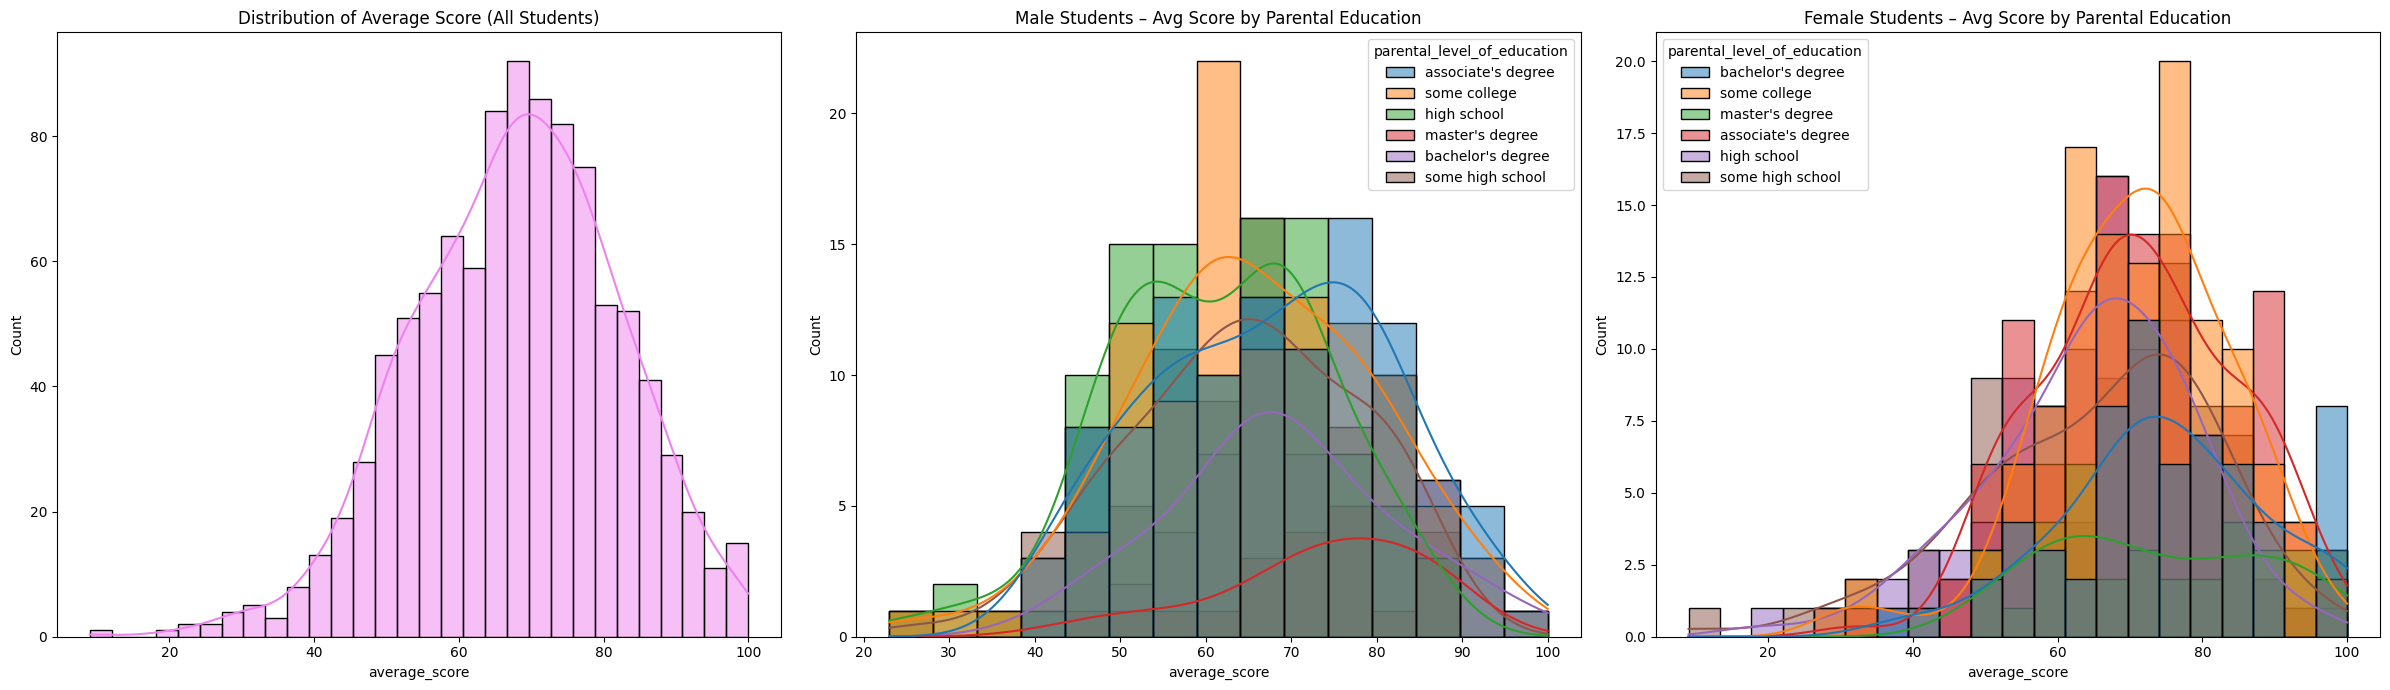

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# 1st Plot – Overall distribution
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='violet', ax=axes[0])
axes[0].set_title("Distribution of Average Score (All Students)")

# 2nd Plot – Male
sns.histplot(
    data=df[df.gender == 'male'],
    x='average_score',
    kde=True,
    hue='parental_level_of_education',
    ax=axes[1]
)
axes[1].set_title("Male Students – Avg Score by Parental Education")

# 3rd Plot – Female
sns.histplot(
    data=df[df.gender == 'female'],
    x='average_score',
    kde=True,
    hue='parental_level_of_education',
    ax=axes[2]
)
axes[2].set_title("Female Students – Avg Score by Parental Education")

plt.tight_layout()
plt.show()


## Insights :

- In general, Parents education dont help student to perform well in exam
- when you observe in Chart 2, we can say that whose education is of Associate's degree or master's degree their child tend to perform well in exams.
- when you observe in chart 3, we can say that for female students has no effect with parental education.

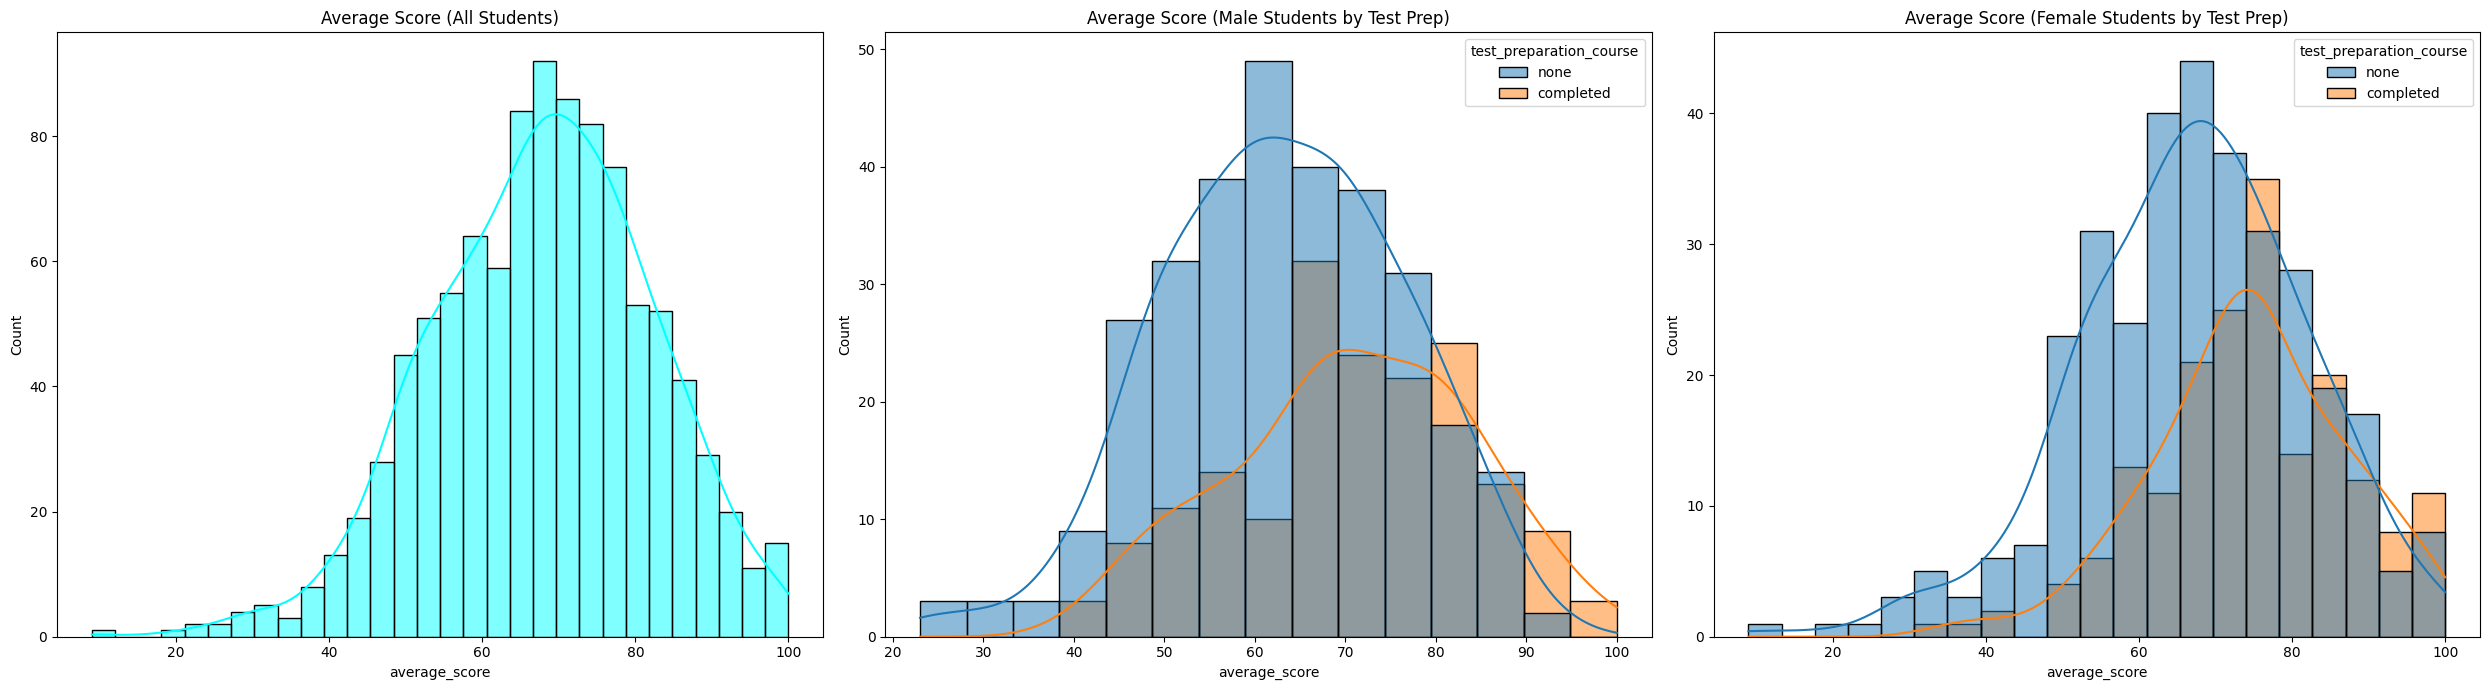

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Plot 1 – All students
sns.histplot(
    data=df,
    x='average_score',
    bins=30,
    kde=True,
    color='cyan',
    ax=axes[0]
)
axes[0].set_title("Average Score (All Students)")

# Plot 2 – Male students
sns.histplot(
    data=df[df.gender == 'male'],
    x='average_score',
    kde=True,
    hue='test_preparation_course',
    ax=axes[1]
)
axes[1].set_title("Average Score (Male Students by Test Prep)")

# Plot 3 – Female students
sns.histplot(
    data=df[df.gender == 'female'],
    x='average_score',
    kde=True,
    hue='test_preparation_course',
    ax=axes[2]
)
axes[2].set_title("Average Score (Female Students by Test Prep)")

plt.tight_layout()
plt.show()


## Insight:

- Students performing well in exam who are all completing the test prepartion course.

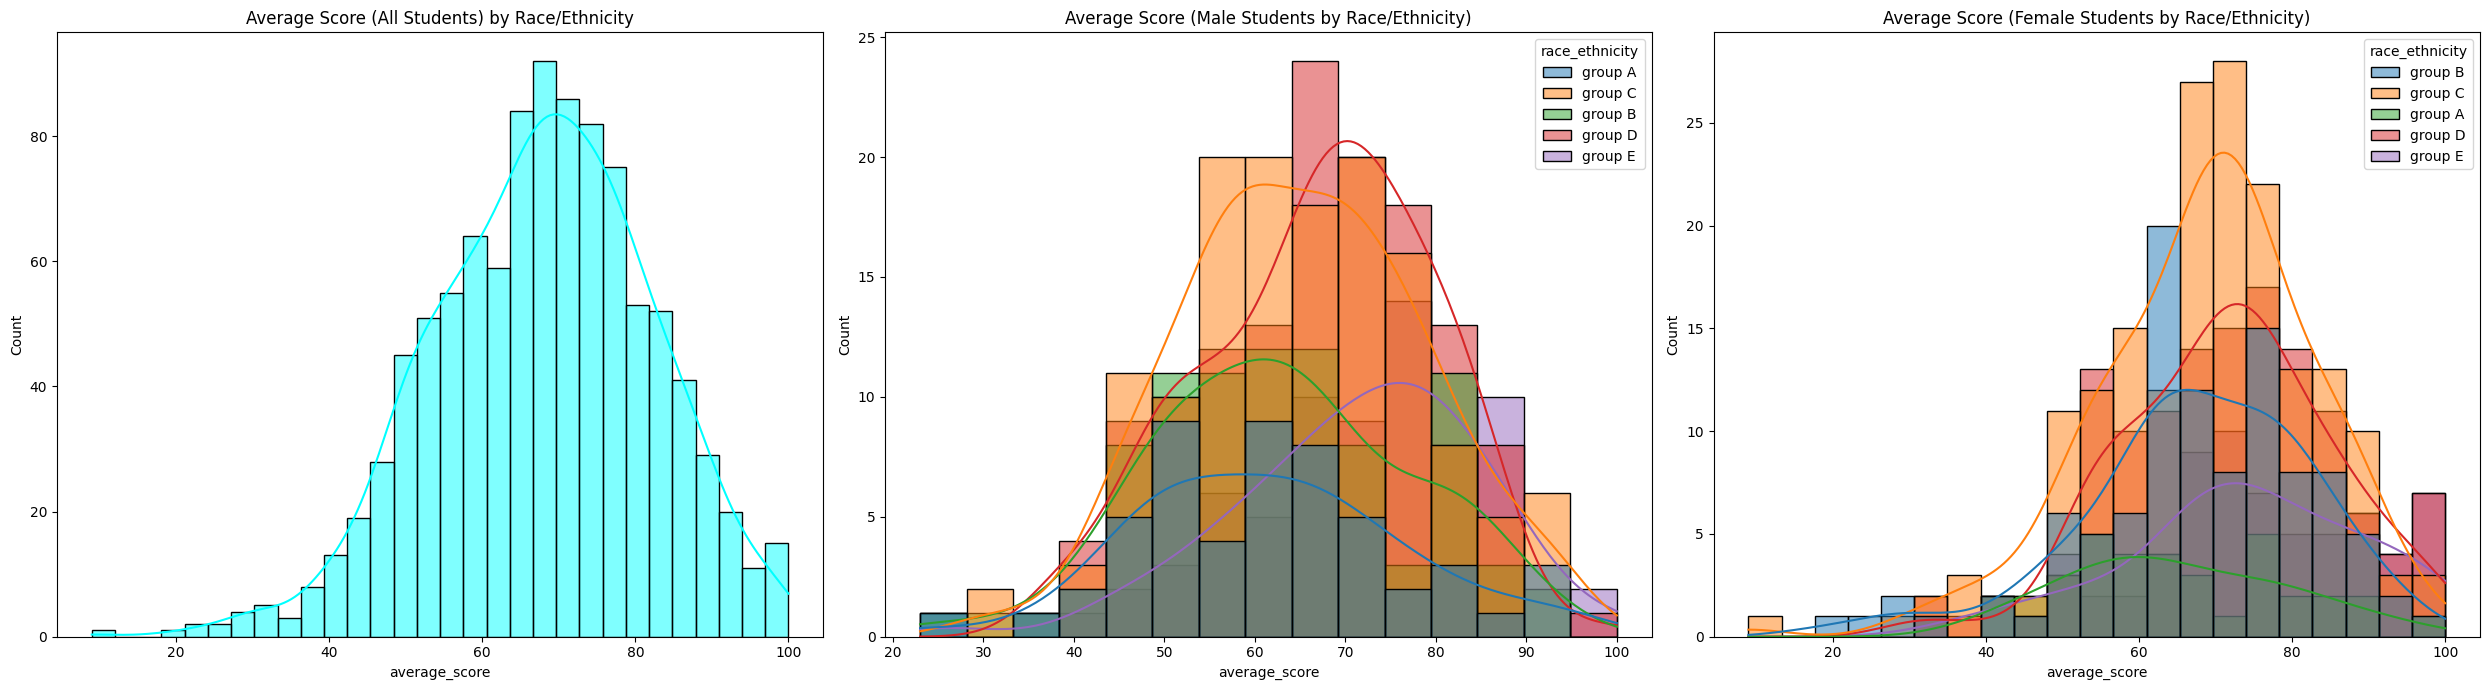

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Plot 1 – All students
sns.histplot(
    data=df,
    x='average_score',
    bins=30,
    kde=True,
    color='cyan',
    ax=axes[0]
)
axes[0].set_title("Average Score (All Students) by Race/Ethnicity")

# Plot 2 – Male students
sns.histplot(
    data=df[df.gender == 'male'],
    x='average_score',
    kde=True,
    hue='race_ethnicity',
    ax=axes[1]
)
axes[1].set_title("Average Score (Male Students by Race/Ethnicity)")

# Plot 3 – Female students
sns.histplot(
    data=df[df.gender == 'female'],
    x='average_score',
    kde=True,
    hue='race_ethnicity',
    ax=axes[2]
)
axes[2].set_title("Average Score (Female Students by Race/Ethnicity)")

plt.tight_layout()
plt.show()


Insights: Students from Group B and Group C tends to perform poorly in exams.

## Maximum score of students in all three subjects (Math score, Reading score, Writing score)

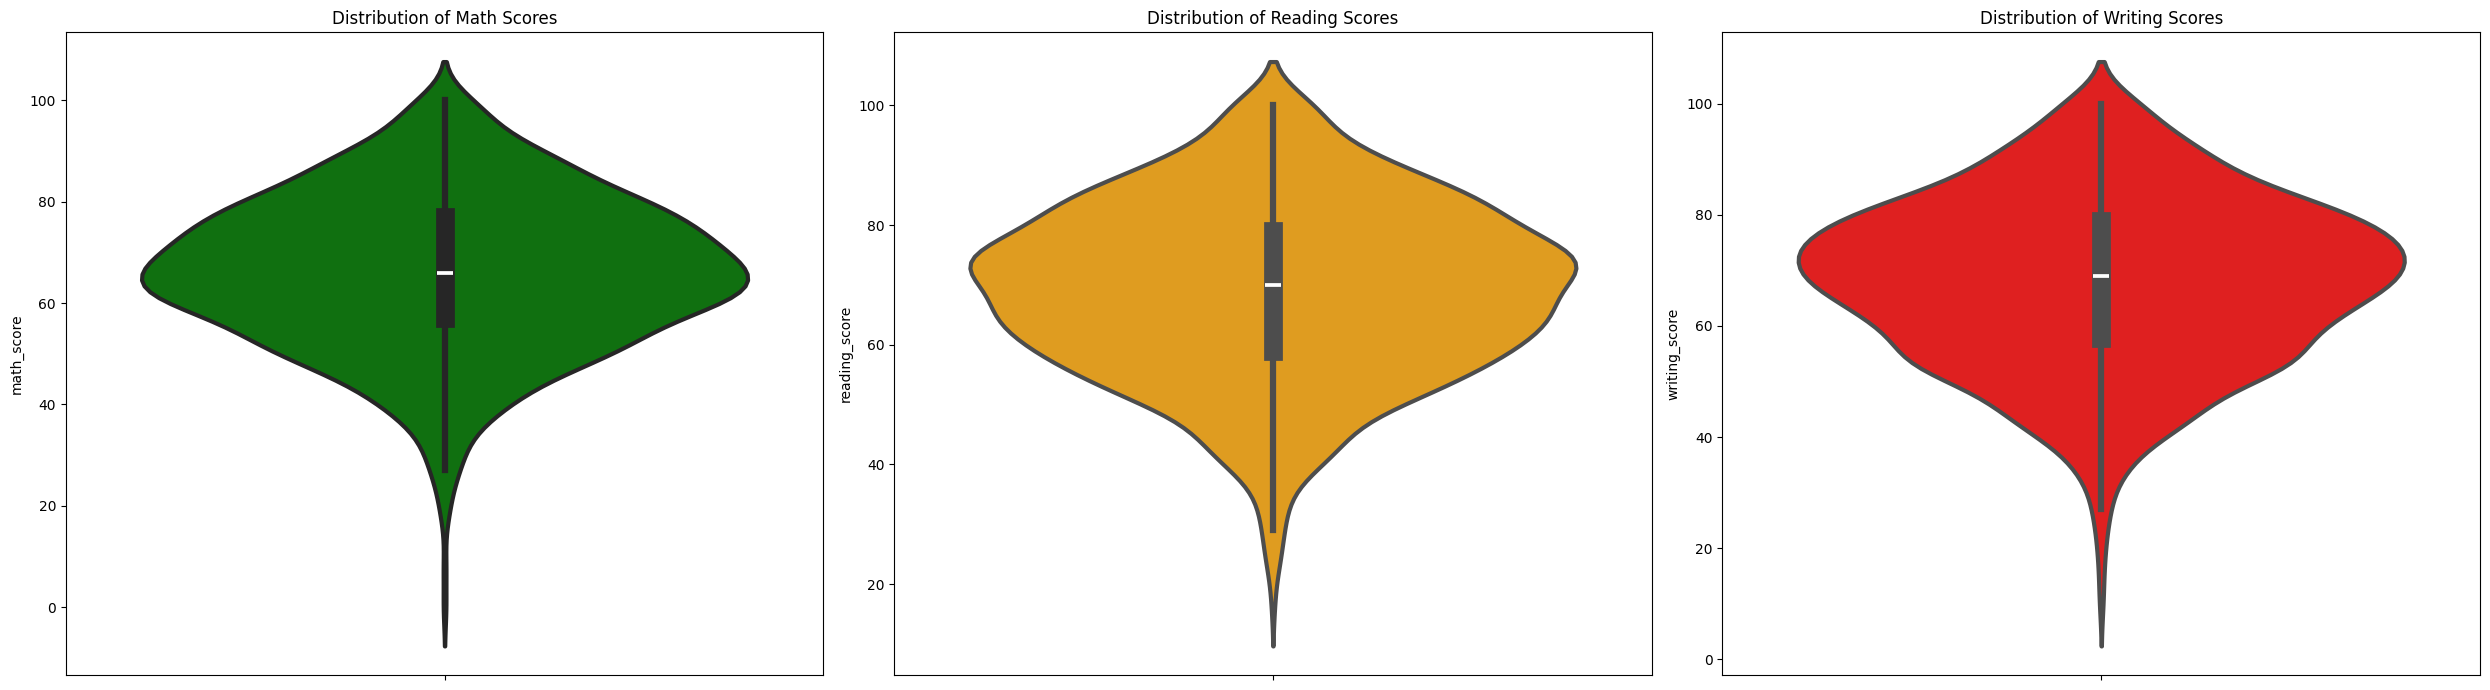

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Math Score
sns.violinplot(
    y='math_score',
    data=df,
    color='green',
    linewidth=3,
    ax=axes[0]          # attach plot to first axis
)
axes[0].set_title("Distribution of Math Scores")

# Reading Score
sns.violinplot(
    y='reading_score',
    data=df,
    color='orange',
    linewidth=3,
    ax=axes[1]          # attach plot to second axis
)
axes[1].set_title("Distribution of Reading Scores")

# Writing Score
sns.violinplot(
    y='writing_score',
    data=df,
    color='red',
    linewidth=3,
    ax=axes[2]          # attach plot to third axis
)
axes[2].set_title("Distribution of Writing Scores")

plt.tight_layout()
plt.show()


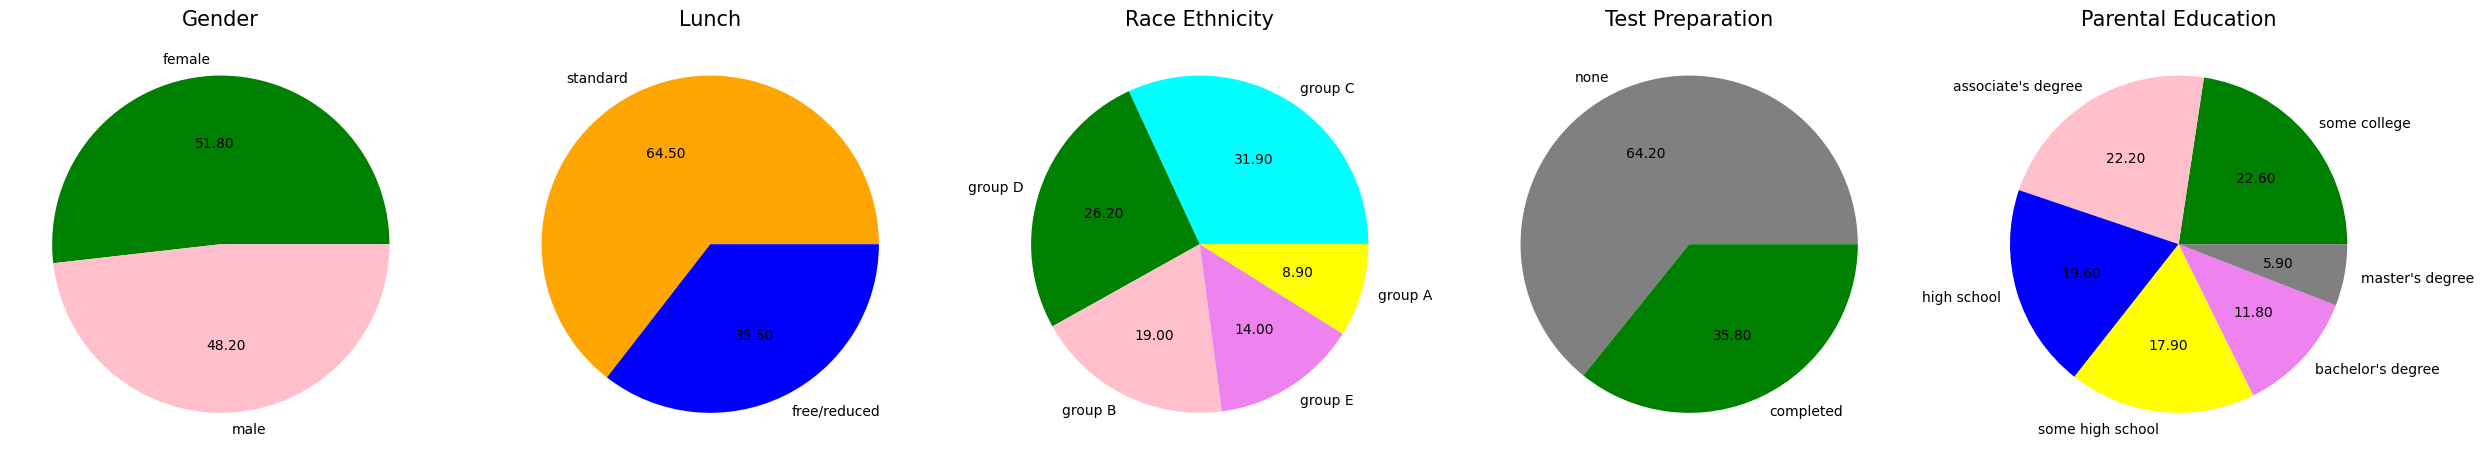

In [59]:
plt.rcParams['figure.figsize'] = (25, 12)

# --------- 1st Pie (Gender) ---------
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
colors = ['green', 'pink']
plt.pie(size, labels=size.index, colors=colors, autopct='%.2f')
plt.title('Gender', fontsize=15)
plt.axis('off')

# --------- 2nd Pie (Lunch) ---------
plt.subplot(1, 5, 2)
size = df['lunch'].value_counts()
colors = ['orange', 'blue']
plt.pie(size, labels=size.index, colors=colors, autopct='%.2f')
plt.title('Lunch', fontsize=15)
plt.axis('off')

# --------- 3rd Pie (Race Ethnicity) ---------
plt.subplot(1, 5, 3)
size = df['race_ethnicity'].value_counts()
colors = ['cyan', 'green', 'pink', 'violet', 'yellow']
plt.pie(size, labels=size.index, colors=colors, autopct='%.2f')
plt.title('Race Ethnicity', fontsize=15)
plt.axis('off')

# --------- 4th Pie (Test Preparation) ---------
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
colors = ['grey', 'green']
plt.pie(size, labels=size.index, colors=colors, autopct='%.2f')
plt.title('Test Preparation', fontsize=15)
plt.axis('off')

# --------- 5th Pie (Parental Education) ---------
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
colors = ['green','pink','blue','yellow','violet','grey']
plt.pie(size, labels=size.index, colors=colors, autopct='%.2f')
plt.title('Parental Education', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()


## Insights:

- No.of male and female students are almost equal
- No.of students who have standard lunch are greater
- No.of Students are greater in Group B race ethnicity
- No.of Students who are not enrolled in test preparation course
- No.of Students whose parental level of education is greater for 'Some college' and followed by 'bachelor degree'

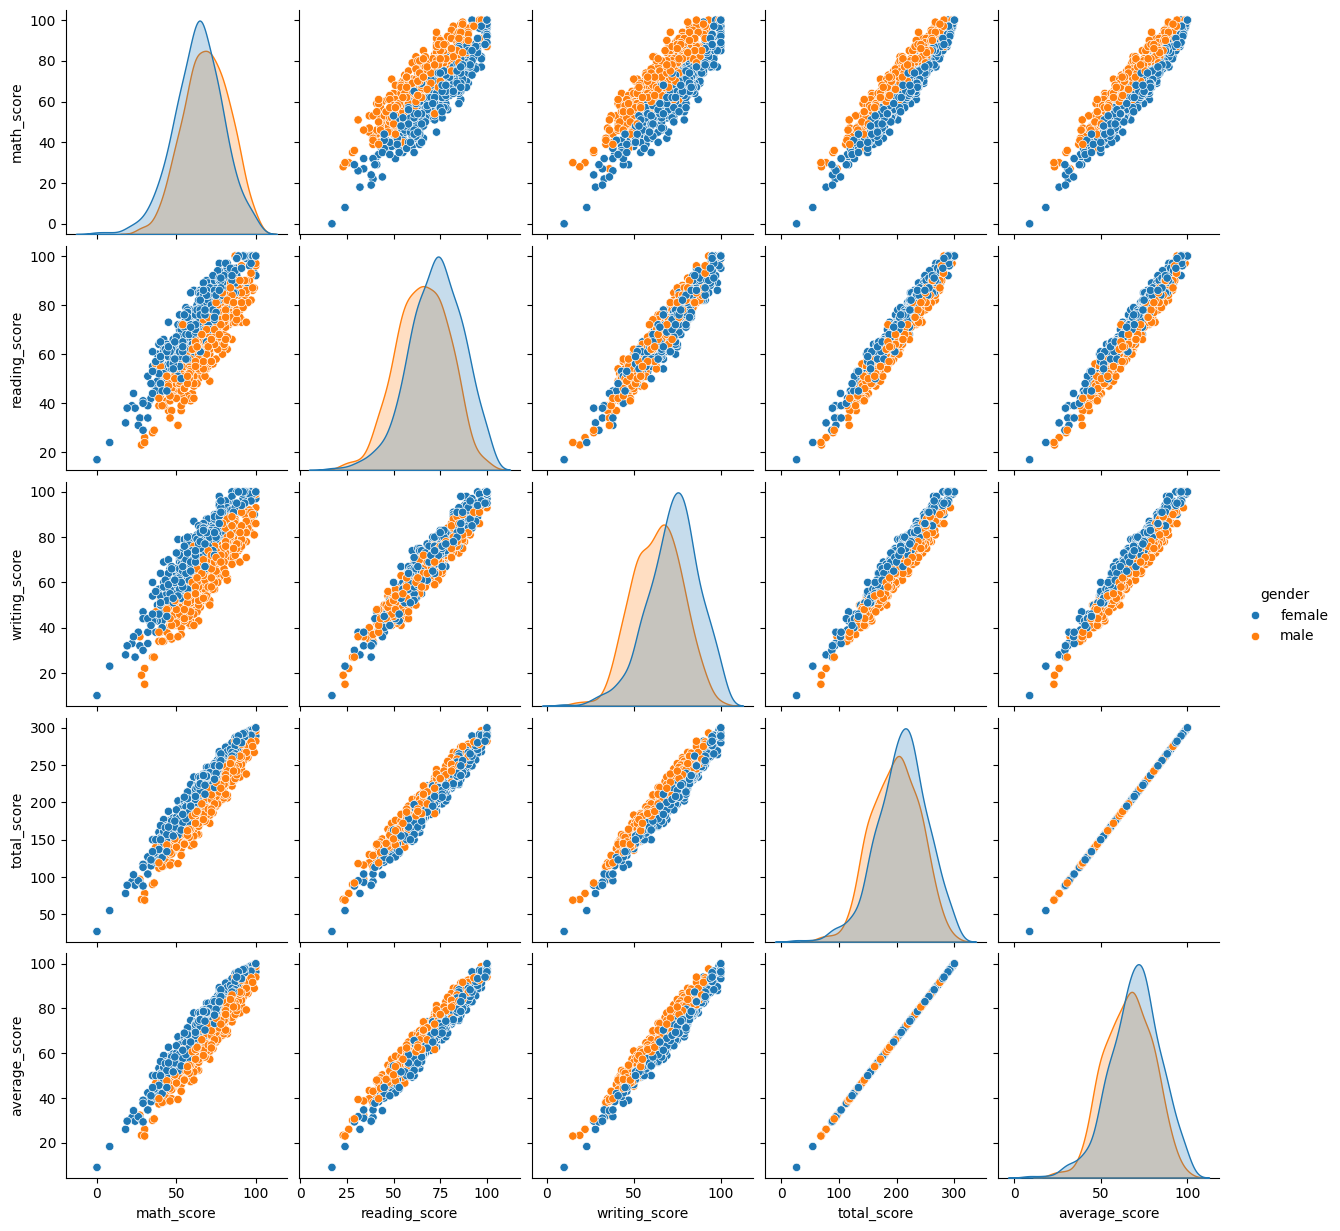

In [61]:
sns.pairplot(df, hue = 'gender')